In [2]:
## Import dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from getpass import getpass
from sqlalchemy import create_engine 
import psycopg2
from sklearn.preprocessing import LabelEncoder

In [142]:
## Load the data
file_path = Path("Resources/DisneylandReviews.csv")
disney_raw_df = pd.read_csv(file_path)

In [143]:
# Inspect data
disney_raw_df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [144]:
# Inspect counts
disney_raw_df.count()

Review_ID            42656
Rating               42656
Year_Month           42656
Reviewer_Location    42656
Review_Text          42656
Branch               42656
dtype: int64

In [145]:
# Inspect data types
disney_raw_df.dtypes

Review_ID             int64
Rating                int64
Year_Month           object
Reviewer_Location    object
Review_Text          object
Branch               object
dtype: object

In [146]:
# Check length of reviews
disney_raw_df["Review_Text"].astype('str').str.split().str.len()

0         59
1        171
2        169
3         91
4         31
        ... 
42651    173
42652    191
42653    109
42654    112
42655    179
Name: Review_Text, Length: 42656, dtype: int64

In [147]:
# Check first entry to confirm results
disney_raw_df["Review_Text"].loc[0]

"If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides  its a Small World  is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well. "

In [148]:
disney_raw_df["Review_Text"].astype('str').str.len().loc[0]

329

In [149]:
# Add column for review lengths
disney_raw_df["Review_Words"] = disney_raw_df["Review_Text"].astype('str').str.split().str.len()
disney_raw_df["Review_Letters"] = disney_raw_df["Review_Text"].astype('str').str.len()

In [150]:
disney_raw_df.describe()

,Review_ID,Rating,Review_Words,Review_Letters
count,4.265600e+04,42656.000000,42656.000000,42656.000000
mean,3.188553e+08,4.217695,129.703817,696.817540
std,1.657092e+08,1.063371,154.713032,831.396751
min,1.398724e+06,1.000000,3.000000,18.000000
25%,1.743274e+08,4.000000,45.000000,239.000000
50%,2.907583e+08,5.000000,81.000000,435.000000
75%,4.489579e+08,5.000000,156.000000,837.000000
max,6.708014e+08,5.000000,3963.000000,20756.000000


In [151]:
# Remove data with missing time values
disney_raw_df = disney_raw_df[disney_raw_df["Year_Month"]!='missing']

In [152]:
# Split year/month column into two columns
disney_raw_df[["Year", "Month"]] = disney_raw_df["Year_Month"].str.split(pat="-", expand = True)

C:\Anaconda\envs\mlenv\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [153]:
disney_raw_df["Year_Month"].value_counts()

2015-8     786
2015-7     759
2015-12    701
2015-6     692
2015-5     678
          ... 
2010-8       7
2010-5       4
2010-3       2
2019-5       2
2010-4       1
Name: Year_Month, Length: 111, dtype: int64

In [154]:
# Check for nulls
disney_raw_df.isna().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
Review_Words         0
Review_Letters       0
Year                 0
Month                0
dtype: int64

In [155]:
# Check unique locations
locations = disney_raw_df["Reviewer_Location"].unique()
sorted(locations)

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belgium',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Cambodia',
 'Canada',
 'Caribbean Netherlands',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cura�ao',
 'Cyprus',
 'Czechia',
 "C�te d'Ivoire",
 'Democratic Republic of the Congo',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Falkland Islands (Islas Malvinas)',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guernsey',
 'Haiti',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Isle of Man',
 'Israel',
 'Italy',
 'Jamaica',
 'J

In [156]:
# Replace locations with missing characters
disney_raw_df["Reviewer_Location"] = disney_raw_df["Reviewer_Location"].replace(["Cura�ao", "C�te d'Ivoire", "�land Islands"],["Curacao", "Cote d'Ivoire", "Aland Islands"])

C:\Anaconda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [157]:
# Check which disney parks were visited
disney_raw_df["Branch"].unique()

array(['Disneyland_HongKong', 'Disneyland_California', 'Disneyland_Paris'],
      dtype=object)

In [158]:
# Come up with function for determining if reviewer was a local or tourist (in broad terms)
def tourist(row):
    if (row["Branch"]=="Disneyland_HongKong") & (row["Reviewer_Location"]=="Hong Kong"):
        return 0
    elif (row["Branch"]=="Disneyland_California") & (row["Reviewer_Location"]=="United States"):
        return 0 
    elif (row["Branch"]=="Disneyland_Paris") & (row["Reviewer_Location"]=="France"):
        return 0
    else:
        return 1

In [159]:
# Create tourism column: 1 is a reviewer from another country, 0 is a reviewer from the same country
disney_raw_df["Tourist"] = disney_raw_df.apply(tourist, axis=1)

C:\Anaconda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [160]:
# Check results
disney_raw_df[disney_raw_df["Tourist"]==0]

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Review_Words,Review_Letters,Year,Month,Tourist
19,670033848,5,2018-11,Hong Kong,There is nothing more to say except that you b...,Disneyland_HongKong,44,237,2018,11,0
25,669548161,3,2019-4,Hong Kong,Disneylands the world over are generic apart f...,Disneyland_HongKong,40,229,2019,4,0
39,668111738,5,2018-6,Hong Kong,HKDL got different event for different period....,Disneyland_HongKong,78,463,2018,6,0
67,666075052,4,2019-4,Hong Kong,The hotel is clean and tidy . The environment ...,Disneyland_HongKong,66,343,2019,4,0
82,664602208,5,2019-3,Hong Kong,My wife and I brought 2 daughers in law to Hon...,Disneyland_HongKong,91,468,2019,3,0
...,...,...,...,...,...,...,...,...,...,...,...
41895,116968337,3,2011-8,France,"While we left with huge smiles on our faces, b...",Disneyland_Paris,230,1323,2011,8,0
41918,116616689,4,2011-7,France,I was born inParis in the early 1970s and rais...,Disneyland_Paris,642,3564,2011,7,0
41969,115605447,5,2011-7,France,Now I'm a massive cynic about these types of t...,Disneyland_Paris,593,3302,2011,7,0
42003,113183230,4,2011-6,France,We live in the area and have annual passes so ...,Disneyland_Paris,295,1452,2011,6,0


In [161]:
# Check counts of tourist vs local
disney_raw_df["Tourist"].value_counts()

1    27897
0    12146
Name: Tourist, dtype: int64

In [162]:
# Change data types
disney_raw_df["Tourist"] = disney_raw_df["Tourist"].astype(int)
disney_raw_df["Month"] = disney_raw_df["Month"].astype(int)
disney_raw_df["Year"] = disney_raw_df["Year"].astype(int)
disney_raw_df["Year_Month"] = pd.to_datetime(disney_raw_df["Year_Month"])

C:\Anaconda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [163]:
disney_raw_df.dtypes

Review_ID                     int64
Rating                        int64
Year_Month           datetime64[ns]
Reviewer_Location            object
Review_Text                  object
Branch                       object
Review_Words                  int64
Review_Letters                int64
Year                          int32
Month                         int32
Tourist                       int32
dtype: object

In [164]:
# Look at range of years
sorted(disney_raw_df["Year"].unique())

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [165]:
# Look for duplicate rows
disney_raw_df["Review_ID"].duplicated().sum()

20

In [166]:
# Drop duplicate rows
disney_raw_df = disney_raw_df.drop_duplicates(subset="Review_ID", keep="first")

In [167]:
# We may have to bin locations; check number/distribution of unique entries
disney_raw_df["Reviewer_Location"].value_counts()

United States     13513
United Kingdom     9115
Australia          4409
Canada             2115
India              1469
                  ...  
Sudan                 1
Grenada               1
Cayman Islands        1
Iraq                  1
South Sudan           1
Name: Reviewer_Location, Length: 162, dtype: int64

<AxesSubplot:ylabel='Density'>

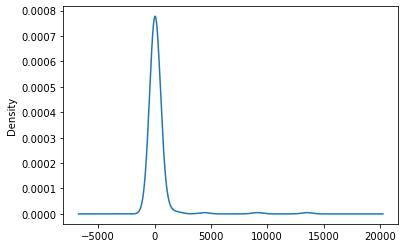

In [169]:
disney_raw_df.Reviewer_Location.value_counts().plot.density()

In [171]:
location_counts = disney_raw_df.Reviewer_Location.value_counts()
# Determine which values to replace if counts are less than ..?
replace_location = list(location_counts[location_counts < 500].index)

# Replace in dataframe
for place in replace_location:
    disney_raw_df.Reviewer_Location = disney_raw_df.Reviewer_Location.replace(place,"Other")
    
# Check to make sure binning was successful
disney_raw_df.Reviewer_Location.value_counts()

United States     13513
United Kingdom     9115
Other              5110
Australia          4409
Canada             2115
India              1469
Philippines        1024
Singapore           968
New Zealand         714
Malaysia            560
Hong Kong           515
Indonesia           511
Name: Reviewer_Location, dtype: int64

<AxesSubplot:ylabel='Density'>

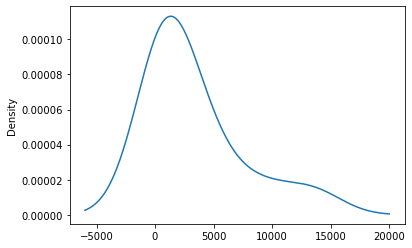

In [172]:
disney_raw_df.Reviewer_Location.value_counts().plot.density()

In [173]:
# Create instance of labelencoder
labelencoder = LabelEncoder()
# Encode categorical data
disney_raw_df["Branch_Encoded"] = labelencoder.fit_transform(disney_raw_df["Branch"])
disney_raw_df["Location_Encoded"] = labelencoder.fit_transform(disney_raw_df["Reviewer_Location"])

In [174]:
# View encoded branches
disney_raw_df.groupby(["Branch_Encoded", "Branch"]).size()

Branch_Encoded  Branch               
0               Disneyland_California    18196
1               Disneyland_HongKong       9134
2               Disneyland_Paris         12693
dtype: int64

In [183]:
disney_raw_df.groupby(["Tourist", "Branch"]).size()

Tourist  Branch               
0        Disneyland_California    11470
         Disneyland_HongKong        491
         Disneyland_Paris           181
1        Disneyland_California     6726
         Disneyland_HongKong       8643
         Disneyland_Paris         12512
dtype: int64

In [175]:
# View encoded locations
disney_raw_df.groupby(["Location_Encoded", "Reviewer_Location"]).size()

Location_Encoded  Reviewer_Location
0                 Australia             4409
1                 Canada                2115
2                 Hong Kong              515
3                 India                 1469
4                 Indonesia              511
5                 Malaysia               560
6                 New Zealand            714
7                 Other                 5110
8                 Philippines           1024
9                 Singapore              968
10                United Kingdom        9115
11                United States        13513
dtype: int64

In [176]:
disney_clean_df = disney_raw_df

In [177]:
# Reset index
disney_clean_df.reset_index(inplace=True, drop=True)

In [178]:
## Now we upload our dataframe to SQL
# Build the connection string
protocol = 'postgresql'
user = 'postgres'
location = 'localhost'
port = '5432'
db = 'disney_db'
password = getpass('Enter database password')

Enter database password········


In [179]:
# Store string as variable
db_string = f'{protocol}://{user}:{password}@{location}:{port}/{db}'

In [180]:
# Create database engine
engine = create_engine(db_string)

In [181]:
# Send to database
disney_clean_df.to_sql(name='disneyland_reviews', con=engine, if_exists='replace')

In [182]:
# Export to csv
disney_clean_df.to_csv("Resources/disney_clean.csv", index=False)